# Decision Tree Exercises

### Exercises

Use the titanic data:

- 1. What is your baseline prediction? 
- 2. What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). 
- 3. When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [18]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import acquire

In [19]:
df = acquire.get_titanic_data()

In [4]:
df

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [5]:
df.value_counts()

Unnamed: 0  passenger_id  survived  pclass  sex     age   sibsp  parch  fare      embarked  class   deck  embark_town  alone
1           1             1         1       female  38.0  1      0      71.2833   C         First   C     Cherbourg    0        1
571         571           1         1       female  53.0  2      0      51.4792   S         First   C     Southampton  0        1
577         577           1         1       female  39.0  1      0      55.9000   S         First   E     Southampton  0        1
581         581           1         1       female  39.0  1      1      110.8833  C         First   C     Cherbourg    0        1
583         583           0         1       male    36.0  0      0      40.1250   C         First   A     Cherbourg    1        1
                                                                                                                               ..
325         325           1         1       female  36.0  0      0      135.6333  C         Fir

In [15]:
# Which label appears most frequently in our dataset?
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [9]:
# Baseline prediction will be the most prevalent which is 0 for survived (in other words, did not survive)
df['baseline'] = 0
df

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,baseline
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1,0
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1,0
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1,0
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1,0


In [17]:
# Baseline accuracy:

baseline_accuracy = (df.survived == df.baseline).mean()

print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 61.62%


In [56]:
#Replace string values in columns to prepare data for model

df.replace({'sex':{'male':1, 'female':0}}, inplace=True)  #male is 1, female is 0

df.replace({'class':{'First':1, 'Second':2, 'Third':3}}, inplace=True) #First class is 2, Second is 2, and Third is 3

df.replace({'deck':{'A':1, 'B':2, 'C':3}}, inplace=True) #NaN is 0, A is 1, B is 2, C is 3

df.replace({'embark_town':{'Cherbourg':1, 'Southampton':2, 'Queenstown':3}}, inplace=True) #First class is 2, Second is 2, and Third is 3

df.replace({'embarked':{'C':1, 'S':2, 'Q':3}}, inplace=True) #First class is 2, Second is 2, and Third is 3






In [57]:
# drop rows where embarked/embark town are null values
df = df[~df.embark_town.isnull()]

In [68]:
# drop rows where age town are null values
df = df[~df.age.isnull()]

#Or we can impute using the median age because it looks like there's nothing no age folks are way different
#df.age = df.age.fillna(value=df.age.median)

In [69]:
# drop the deck column
#df = df.drop(columns='deck')

In [70]:
# encode embarked using dummy columns
titanic_dummies = pd.get_dummies(df.embark_town, drop_first=True)

In [71]:
df

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
0,0,0,0,3,1,22.0,1,0,7.2500,2,3,2.0,0
1,1,1,1,1,0,38.0,1,0,71.2833,1,1,1.0,0
2,2,2,1,3,0,26.0,0,0,7.9250,2,3,2.0,1
3,3,3,1,1,0,35.0,1,0,53.1000,2,1,2.0,0
4,4,4,0,3,1,35.0,0,0,8.0500,2,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,885,885,0,3,0,39.0,0,5,29.1250,3,3,3.0,0
886,886,886,0,2,1,27.0,0,0,13.0000,2,2,2.0,1
887,887,887,1,1,0,19.0,0,0,30.0000,2,1,2.0,1
889,889,889,1,1,1,26.0,0,0,30.0000,1,1,1.0,1


In [188]:
#How many nulls are in our dataset?
df.isna().sum()

Unnamed: 0      0
passenger_id    0
survived        0
pclass          0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
class           0
embark_town     0
alone           0
dtype: int64

In [72]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [73]:
train.shape

(497, 13)

In [128]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [129]:
X_train

,Unnamed: 0,passenger_id,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
450,450,450,2,1,36.0,1,2,27.7500,2,2,2.0,0
543,543,543,2,1,32.0,1,0,26.0000,2,2,2.0,0
157,157,157,3,1,30.0,0,0,8.0500,2,3,2.0,1
462,462,462,1,1,47.0,0,0,38.5000,2,1,2.0,1
397,397,397,2,1,46.0,0,0,26.0000,2,2,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
820,820,820,1,0,52.0,1,1,93.5000,2,1,2.0,0
673,673,673,2,1,31.0,0,0,13.0000,2,2,2.0,1
310,310,310,1,0,24.0,0,0,83.1583,1,1,1.0,1
72,72,72,2,1,21.0,0,0,73.5000,2,2,2.0,1


In [ ]:
# The mode is a great baseline
baseline = y_train.mode()

#
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline.prediction.mean()
print("Baseline accuracy: {round(baseline_accuracy, 2)}")

In [130]:
#Train the model

#Create the Decision Tree object with desired hyper-parameters.

clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [131]:
#Fit the random forest algorithm to the training data.

# model.fit(X, y)

clf = clf.fit(X_train, y_train)

In [132]:
#Graphviz: Visualize the Decision Tree

import graphviz
from graphviz import Graph

dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

'titanic_decision_tree.pdf'

In [133]:
#Make Predictions on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 0, 0])

In [134]:
#Estimate the probability using the training data

y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.9010989, 0.0989011],
       [0.9010989, 0.0989011],
       [0.9010989, 0.0989011],
       [0.6      , 0.4      ],
       [0.9010989, 0.0989011]])

In [135]:
#Evaluate the Model

#Compute Accuracy

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.84


In [136]:
#Create a confusion matrix

confusion_matrix(y_train, y_pred)

array([[230,   7],
       [ 56, 105]])

In [137]:
y_train.value_counts()

0    237
1    161
Name: survived, dtype: int64

In [138]:
#Add labels

import pandas as pd

labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,230,7
1,56,105


In [139]:
#Print classification report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       237
           1       0.94      0.65      0.77       161

    accuracy                           0.84       398
   macro avg       0.87      0.81      0.82       398
weighted avg       0.86      0.84      0.83       398



In [140]:
#Evaluate the Model with our Validate dataset

#Compute the accuracy of the model when run on the validate data

print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.78


In [141]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       102
           1       0.88      0.52      0.65        69

    accuracy                           0.78       171
   macro avg       0.81      0.74      0.75       171
weighted avg       0.80      0.78      0.76       171



In [142]:
#Train the model with a max_depth of 2 to compare values

#Create the Decision Tree object with desired hyper-parameters.

clf = DecisionTreeClassifier(max_depth=2, random_state=123)

In [143]:
clf = clf.fit(X_train, y_train)

In [144]:
dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

'titanic_decision_tree.pdf'

In [145]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 0, 0])

In [146]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.83122363, 0.16877637],
       [0.83122363, 0.16877637],
       [0.83122363, 0.16877637],
       [0.83122363, 0.16877637],
       [0.83122363, 0.16877637]])

In [147]:
y_train.value_counts()

0    237
1    161
Name: survived, dtype: int64

In [148]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,228,9
1,66,95


In [149]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       237
           1       0.91      0.59      0.72       161

    accuracy                           0.81       398
   macro avg       0.84      0.78      0.79       398
weighted avg       0.83      0.81      0.80       398



In [150]:

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.81


In [151]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.77


In [152]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83       102
           1       0.86      0.52      0.65        69

    accuracy                           0.77       171
   macro avg       0.80      0.73      0.74       171
weighted avg       0.79      0.77      0.76       171



In [153]:
#Train the model with a max_depth of 4 to compare values

#Create the Decision Tree object with desired hyper-parameters.

clf = DecisionTreeClassifier(max_depth=4, random_state=123)

In [154]:
clf = clf.fit(X_train, y_train)

In [155]:
dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

'titanic_decision_tree.pdf'

In [156]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 0, 0])

In [157]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.90607735, 0.09392265],
       [0.90607735, 0.09392265],
       [0.90607735, 0.09392265],
       [0.74285714, 0.25714286],
       [0.90607735, 0.09392265]])

In [158]:

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.86


In [159]:
confusion_matrix(y_train, y_pred)

array([[215,  22],
       [ 32, 129]])

In [160]:
y_train.value_counts()

0    237
1    161
Name: survived, dtype: int64

In [161]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,215,22
1,32,129


In [162]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       237
           1       0.85      0.80      0.83       161

    accuracy                           0.86       398
   macro avg       0.86      0.85      0.86       398
weighted avg       0.86      0.86      0.86       398



In [385]:
#print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
#     .format(clf.score(X_validate, y_validate)))()

In [164]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       102
           1       0.80      0.64      0.71        69

    accuracy                           0.79       171
   macro avg       0.79      0.76      0.77       171
weighted avg       0.79      0.79      0.78       171



# Random Forest Exercises

#### Continue working in your model file with titanic data to do the following:

- Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [204]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import acquire

# read Titanic data using acquire.py
df = acquire.get_titanic_data()



df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [205]:
#Clean up columns
df = df.set_index("passenger_id")
df = df.drop(columns=["Unnamed: 0", "embarked"])
df

,survived,pclass,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
passenger_id,,,,,,,,,,,
0,0,3,male,22.0,1,0,7.2500,Third,NaN,Southampton,0
1,1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Third,NaN,Southampton,1
3,1,1,female,35.0,1,0,53.1000,First,C,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,NaN,Southampton,1
887,1,1,female,19.0,0,0,30.0000,First,B,Southampton,1
888,0,3,female,NaN,1,2,23.4500,Third,NaN,Southampton,0


In [206]:
# Drop deck because there are far too many nulls
df = df.drop(columns=["deck"])
df

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone
passenger_id,,,,,,,,,,
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,0
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Third,Southampton,1
3,1,1,female,35.0,1,0,53.1000,First,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Third,Southampton,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,Southampton,1
887,1,1,female,19.0,0,0,30.0000,First,Southampton,1
888,0,3,female,NaN,1,2,23.4500,Third,Southampton,0


In [207]:
# Let's fill embark_town with the most common observation
embark_town_fill = df.embark_town.mode()

df.embark_town = df.embark_town.fillna(value=embark_town_fill)
df

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone
passenger_id,,,,,,,,,,
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,0
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Third,Southampton,1
3,1,1,female,35.0,1,0,53.1000,First,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Third,Southampton,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,Southampton,1
887,1,1,female,19.0,0,0,30.0000,First,Southampton,1
888,0,3,female,NaN,1,2,23.4500,Third,Southampton,0


In [216]:
#Impute using the median age to fill nulls
df.age = df.age.fillna(value=df.age.median())

In [217]:
#Replace string values in the class column to be integers

df.replace({'class':{'First':1, 'Second':2, 'Third':3}}, inplace=True) #First class is 2, Second is 2, and Third is 3

In [220]:
# Time to encode the encodeable!
#dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=[True, True])

# Drop the original columns we encoded
#df = df.drop(columns=["sex", "embark_town"])

# Stitch the df and the dummy_df together again
#df = pd.concat([df, dummy_df], axis=1)
df.head()

,survived,pclass,age,sibsp,parch,fare,class,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
passenger_id,,,,,,,,,,,
0,0,3,22.0,1,0,7.2500,3,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0,0
2,1,3,26.0,0,0,7.9250,3,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,3,1,1,0,1


In [221]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [222]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [223]:
# Create the Random Forest object with desired hyper-parameters.

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [224]:
#Fit the random forest algorithm to the training data.

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [225]:
#RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [226]:
# Evaluate importance, or weight, of each feature.

print(rf.feature_importances_)

[0.06399206 0.22104757 0.04127792 0.0313418  0.22828761 0.05104334
 0.01795887 0.3055752  0.01244705 0.02702857]


In [227]:
# Make Predictions
y_pred = rf.predict(X_train)

In [228]:
# Estimate Probability

y_pred_proba = rf.predict_proba(X_train)

In [229]:
# Evaluate Model

#Compute the Accuracy

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.97


In [230]:
# Create a confusion matrix

print(confusion_matrix(y_train, y_pred))

[[307   0]
 [ 15 176]]


In [231]:
#Create a classificaiton report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       307
           1       1.00      0.92      0.96       191

    accuracy                           0.97       498
   macro avg       0.98      0.96      0.97       498
weighted avg       0.97      0.97      0.97       498



In [232]:
#Validate Model

#Evaluate on Out-of-Sample data

print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))


Accuracy of random forest classifier on test set: 0.80


In [233]:
#  Increasing your min_samples_leaf and decreasing max_depth to modify model

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

In [234]:
#Fit the random forest algorithm to the training data.

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, random_state=123)

In [235]:
# Evaluate importance, or weight, of each feature.

print(rf.feature_importances_)

[0.10058108 0.10470061 0.04607788 0.02557309 0.14834192 0.07814658
 0.01853994 0.43921091 0.01418503 0.02464297]


In [236]:
# Make Predictions
y_pred = rf.predict(X_train)

In [237]:
# Estimate Probability

y_pred_proba = rf.predict_proba(X_train)

In [238]:
# Evaluate Model

#Compute the Accuracy

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.87


In [239]:
#Create a classificaiton report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       307
           1       0.92      0.72      0.81       191

    accuracy                           0.87       498
   macro avg       0.88      0.84      0.86       498
weighted avg       0.88      0.87      0.87       498



In [241]:
#Validate Model

#Evaluate on Out-of-Sample data

print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))



Accuracy of random forest classifier on validate set: 0.80


In [374]:
#  Increasing your min_samples_leaf and decreasing max_depth to modify model

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [375]:
#Fit the random forest algorithm to the training data.

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [376]:
# Evaluate importance, or weight, of each feature.

print(rf.feature_importances_)

[0.13226625 0.07003681 0.02483363 0.01636397 0.1379396  0.10851371
 0.01854238 0.45506737 0.01975866 0.01667763]


In [377]:
# Make Predictions
y_pred = rf.predict(X_train)

In [378]:
# Estimate Probability

y_pred_proba = rf.predict_proba(X_train)

In [379]:
# Evaluate Model

#Compute the Accuracy

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.84


In [380]:
#Create a classification report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       307
           1       0.93      0.62      0.75       191

    accuracy                           0.84       498
   macro avg       0.87      0.80      0.81       498
weighted avg       0.85      0.84      0.83       498



In [381]:
#Validate Model

#Evaluate on Out-of-Sample data

print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))




Accuracy of random forest classifier on validate set: 0.80


In [388]:
#Increasing min_samples_per_leaf, decreasing max_depth

# Let's get loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.923695,0.808411,0.115284
1,3,17,0.901606,0.803738,0.097868
2,4,16,0.889558,0.803738,0.085820
3,5,15,0.883534,0.803738,0.079796
4,6,14,0.881526,0.803738,0.077788
5,7,13,0.869478,0.794393,0.075085
6,8,12,0.871486,0.803738,0.067748
7,9,11,0.861446,0.803738,0.057707
8,10,10,0.857430,0.794393,0.063037
9,11,9,0.849398,0.794393,0.055005


In [386]:
#What if we increase both min_samples_per_leaf and max_depth¶

# Let's get loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,2,0.807229,0.771028,0.036201
1,3,3,0.837349,0.799065,0.038284
2,4,4,0.855422,0.808411,0.047010
3,5,5,0.865462,0.803738,0.061724
4,6,6,0.877510,0.808411,0.069099
5,7,7,0.875502,0.799065,0.076437
6,8,8,0.871486,0.803738,0.067748
7,9,9,0.861446,0.799065,0.062380
8,10,10,0.857430,0.794393,0.063037
9,11,11,0.849398,0.794393,0.055005


<AxesSubplot:xlabel='max_depth', ylabel='difference'>

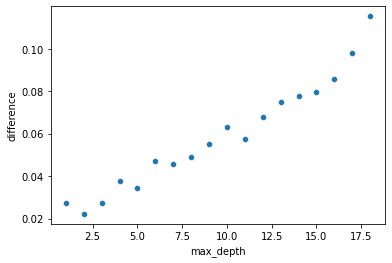

In [389]:
sns.scatterplot(x="max_depth", y="difference", data=df)

In [387]:
#What about a fixed depth and increasing min_samples_leaf

# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 50

for i in range(2, max_depth):
    # Make the model
    depth = 10
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,10,0.923695,0.827103,0.096592
1,3,10,0.901606,0.813084,0.088522
2,4,10,0.891566,0.803738,0.087828
3,5,10,0.883534,0.808411,0.075123
4,6,10,0.879518,0.808411,0.071107
5,7,10,0.867470,0.794393,0.073077
6,8,10,0.867470,0.803738,0.063732
7,9,10,0.861446,0.803738,0.057707
8,10,10,0.857430,0.794393,0.063037
9,11,10,0.849398,0.794393,0.055005


# KNN Lesson Exercises

#### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [392]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



#### Create the KNN Object

In [393]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

#### Fit the model to the training data.

In [394]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### Make Predictions

- Classify each flower by its estimated species.

In [397]:
y_pred = knn.predict(X_train)

#### Estimate the probability of each species, using the training data.

In [398]:
y_pred_proba = knn.predict_proba(X_train)

#### Evaluate Model & Compute the Accuracy

In [399]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.78


In [400]:
#### Create a confusion matrix

In [401]:
print(confusion_matrix(y_train, y_pred))

[[253  54]
 [ 54 137]]


#### Create a classificaiton report

In [402]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       307
           1       0.72      0.72      0.72       191

    accuracy                           0.78       498
   macro avg       0.77      0.77      0.77       498
weighted avg       0.78      0.78      0.78       498



Evaluate on Out-of-Sample data

Compute the accuracy of the model when run on the validate dataset.

#### Evaluate on Out-of-Sample data

- Compute the accuracy of the model when run on the validate dataset.

In [403]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on test set: 0.70


#### Visualize the Model

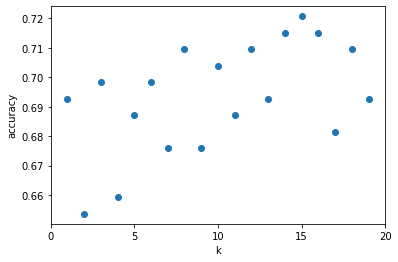

In [404]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

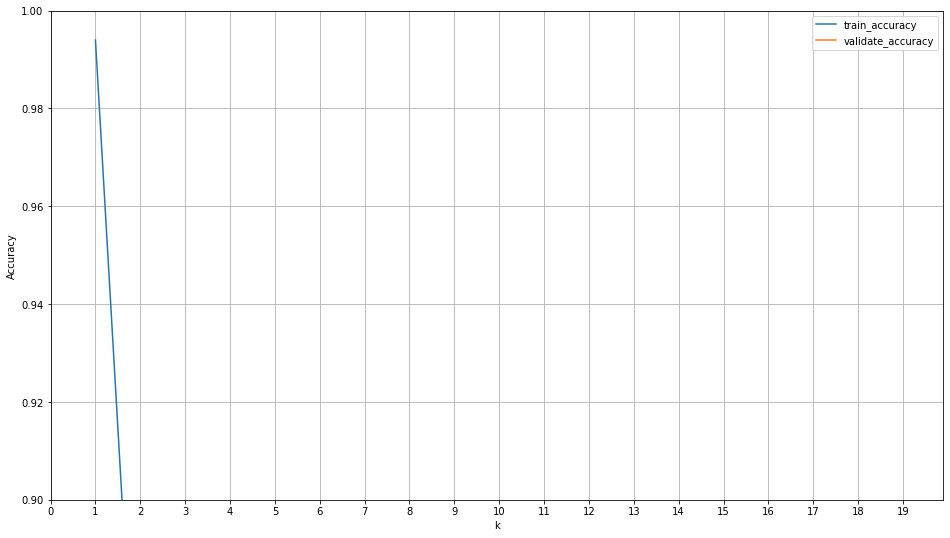

In [405]:
metrics = []

# loop through different values of k
for k in range(1, 20):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylim(0.90, 1)
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,20,1))
plt.grid()

# Work on Modeling Telco Data

In [307]:
import acquire_telco

In [308]:
df_telco = acquire_telco.get_telco_data()

In [309]:
df_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,internet_service_type_id,internet_service_type,payment_type_id,payment_type
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,2,90.45,5957.9,No,3,Two year,1,DSL,2,Mailed check
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,4,45.20,2460.55,No,3,Two year,1,DSL,4,Credit card (automatic)
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,3,45.05,2560.1,No,3,Two year,1,DSL,3,Bank transfer (automatic)
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,4,39.40,825.4,No,3,Two year,1,DSL,4,Credit card (automatic)
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,3,85.15,6316.2,No,3,Two year,1,DSL,3,Bank transfer (automatic)


In [311]:
#df_telco.drop(columns=['Unnamed: 0'], inplace=True)

In [312]:
df_telco.drop(columns=['customer_id'], inplace=True)

In [313]:
df_telco

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,internet_service_type_id,internet_service_type,payment_type_id,payment_type
0,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,Yes,...,2,90.45,5957.9,No,3,Two year,1,DSL,2,Mailed check
1,Male,0,No,No,54,No,No phone service,1,Yes,No,...,4,45.20,2460.55,No,3,Two year,1,DSL,4,Credit card (automatic)
2,Female,0,No,No,56,No,No phone service,1,Yes,Yes,...,3,45.05,2560.1,No,3,Two year,1,DSL,3,Bank transfer (automatic)
3,Male,0,Yes,Yes,20,No,No phone service,1,Yes,No,...,4,39.40,825.4,No,3,Two year,1,DSL,4,Credit card (automatic)
4,Male,0,Yes,No,72,Yes,Yes,1,No,Yes,...,3,85.15,6316.2,No,3,Two year,1,DSL,3,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,Yes,Yes,1,Yes,No,3,No internet service,No internet service,...,2,20.05,20.05,No,1,Month-to-month,3,None,2,Mailed check
7039,Female,0,No,No,19,Yes,No,3,No internet service,No internet service,...,2,19.90,367.55,No,1,Month-to-month,3,None,2,Mailed check
7040,Female,0,No,No,6,Yes,No,3,No internet service,No internet service,...,4,19.70,129.55,No,1,Month-to-month,3,None,4,Credit card (automatic)
7041,Male,0,No,No,1,Yes,No,3,No internet service,No internet service,...,2,18.90,18.9,No,1,Month-to-month,3,None,2,Mailed check


In [314]:
bool_series = pd.isnull(df_telco["churn"])
df_telco[bool_series]

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,internet_service_type_id,internet_service_type,payment_type_id,payment_type


In [382]:
df_telco.shape

(7043, 26)

In [ ]:
#forest.predict_proba(X_train)
#Gives predictions on individual entries

In [ ]:
#forest.feature_importances_

#Go in order of X_train.columns 

#Gives weights of which feature had the most impact